In [155]:
# Imports- COULD PUT IN SCRIPT ON OWN. need to write forloop to dedup data
import praw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#Initialize PRAW
reddit = praw.Reddit(
    client_id='qSrQqSrnV9EgIimmHRjj7Q',
    client_secret='W9uIYSMSrekNc77Riw-IUfAFAFebAA',
    user_agent='myredditapp:v1.2.3 by u/Independent_Math_881',
    username='Independent_Math_881',
    password='DSI911!123'
)

### WSB

In [156]:
# wallstreetbets subreddit
wsb_subreddit = reddit.subreddit('wallstreetbets')
new_posts = wsb_subreddit.new(limit=950)
controversial_posts = wsb_subreddit.controversial(limit=950)
hot_posts = wsb_subreddit.hot(limit=950)
rising_posts = wsb_subreddit.rising(limit=950)
top_posts = wsb_subreddit.top(limit=950)

# list(posts)
# [i.selftext for i in posts]

In [157]:
# Pull neccesssary attributes
data = []

for post in new_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    
for post in controversial_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])

for post in hot_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    
for post in rising_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    
for post in top_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    

In [159]:
# Turn into a dataframe
wsb = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
wsb.drop_duplicates(inplace = True)
# wsb.duplicated
wsb

,created_utc,title,self_text,subreddit
0,1.697588e+09,Summit Therapeutics (SMMT) Large $5 million In...,Soni Manmeet Singh bought $5 million worth of ...,wallstreetbets
1,1.697587e+09,Ardelyx announces FDA approval for XPHOZAH and...,Ardelyx wins long battle for FDA approval of k...,wallstreetbets
2,1.697586e+09,Good Ol' Days,,wallstreetbets
3,1.697584e+09,From $8.5 billion to dead broke: Where it all ...,,wallstreetbets
4,1.697584e+09,After losing all my money in today's kangaroo ...,,wallstreetbets
...,...,...,...,...
3069,1.629130e+09,Apes trying to follow investing strategy,,wallstreetbets
3070,1.616675e+09,"GME Megathread for March 25, 2021","""Holy moley, what a game[stop]"" [(Gould, 1892)...",wallstreetbets
3071,1.638366e+09,Hopefully this is the sentiment now.,,wallstreetbets
3072,1.624311e+09,What’s changed for me since joining WSB.,,wallstreetbets


### CryptoMoonShots

In [54]:
# CryptoMoonShots subreddit
cms_subreddit = reddit.subreddit('CryptoMoonShots')
new_posts = cms_subreddit.new(limit=950)
controversial_posts = cms_subreddit.controversial(limit=950)
hot_posts = cms_subreddit.hot(limit=950)
rising_posts = cms_subreddit.rising(limit=950)
top_posts = cms_subreddit.top(limit=950)

In [55]:
# Pull neccesssary attributes
data = []

for post in new_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    
for post in controversial_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])

for post in hot_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    
for post in rising_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    
for post in top_posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    

In [150]:
# Turn into a dataframe
cms = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
cms.drop_duplicates()
cms

,created_utc,title,self_text,subreddit
0,1.697578e+09,Investors Are Flocking to DexCheck - Find Out ...,It's great to hear about your positive experie...,CryptoMoonShots
1,1.697573e+09,$CUMINU 18+ platform will be game changer in a...,Cummuniti the new 18+ platform will change the...,CryptoMoonShots
2,1.697550e+09,DogeStar - Launching the Meme Masterpiece!,**DOGE STAR**\r \n\rIn a galaxy not so far aw...,CryptoMoonShots
3,1.697550e+09,EcoBonus: Real life utility for building a sus...,Ecobonus is a real-world utility token designe...,CryptoMoonShots
4,1.697550e+09,Hot New MEME Coin with Utility - Krabz Coin - ...,We're all here looking for moon shots and proj...,CryptoMoonShots
...,...,...,...,...
3138,1.696629e+09,How Weaver Labs Can Transform More Than Just T...,Weaver Labs has captured attention for its pot...,CryptoMoonShots
3139,1.697036e+09,Welcome to Jerome Powell ($Powell) Is The Newe...,Jerome Powell ($Powell)\n\nWe're unleashing th...,CryptoMoonShots
3140,1.697494e+09,Hot New MEME Coin with Utility - Krabz Coin - ...,We're all here looking for moon shots and proj...,CryptoMoonShots
3141,1.697470e+09,Hot New MEME Coin with Utility - Krabz Coin - ...,We're all here looking for moon shots and proj...,CryptoMoonShots


### Combine datasets

In [81]:
df = pd.concat([cms, wsb])
df

,created_utc,title,self_text,subreddit
0,1.697578e+09,Investors Are Flocking to DexCheck - Find Out ...,It's great to hear about your positive experie...,CryptoMoonShots
1,1.697573e+09,$CUMINU 18+ platform will be game changer in a...,Cummuniti the new 18+ platform will change the...,CryptoMoonShots
2,1.697550e+09,DogeStar - Launching the Meme Masterpiece!,**DOGE STAR**\r \n\rIn a galaxy not so far aw...,CryptoMoonShots
3,1.697550e+09,EcoBonus: Real life utility for building a sus...,Ecobonus is a real-world utility token designe...,CryptoMoonShots
4,1.697550e+09,Hot New MEME Coin with Utility - Krabz Coin - ...,We're all here looking for moon shots and proj...,CryptoMoonShots
...,...,...,...,...
3065,1.629130e+09,Apes trying to follow investing strategy,,wallstreetbets
3066,1.616675e+09,"GME Megathread for March 25, 2021","""Holy moley, what a game[stop]"" [(Gould, 1892)...",wallstreetbets
3067,1.638366e+09,Hopefully this is the sentiment now.,,wallstreetbets
3068,1.624311e+09,What’s changed for me since joining WSB.,,wallstreetbets


In [82]:
df['subreddit'] = np.where(df['subreddit'] == 'wallstreetbets', 0, 1)
df['text'] = df['title'] + ' ' + df['self_text']
df

,created_utc,title,self_text,subreddit,text
0,1.697578e+09,Investors Are Flocking to DexCheck - Find Out ...,It's great to hear about your positive experie...,1,Investors Are Flocking to DexCheck - Find Out ...
1,1.697573e+09,$CUMINU 18+ platform will be game changer in a...,Cummuniti the new 18+ platform will change the...,1,$CUMINU 18+ platform will be game changer in a...
2,1.697550e+09,DogeStar - Launching the Meme Masterpiece!,**DOGE STAR**\r \n\rIn a galaxy not so far aw...,1,DogeStar - Launching the Meme Masterpiece! **D...
3,1.697550e+09,EcoBonus: Real life utility for building a sus...,Ecobonus is a real-world utility token designe...,1,EcoBonus: Real life utility for building a sus...
4,1.697550e+09,Hot New MEME Coin with Utility - Krabz Coin - ...,We're all here looking for moon shots and proj...,1,Hot New MEME Coin with Utility - Krabz Coin - ...
...,...,...,...,...,...
3065,1.629130e+09,Apes trying to follow investing strategy,,0,Apes trying to follow investing strategy
3066,1.616675e+09,"GME Megathread for March 25, 2021","""Holy moley, what a game[stop]"" [(Gould, 1892)...",0,"GME Megathread for March 25, 2021 ""Holy moley,..."
3067,1.638366e+09,Hopefully this is the sentiment now.,,0,Hopefully this is the sentiment now.
3068,1.624311e+09,What’s changed for me since joining WSB.,,0,What’s changed for me since joining WSB.


In [76]:
# tsla = [i for i in df['text'] if 'tesla' in i]
# tsla[3]

## EDA & Preprocessing

In [83]:
reddit = df[['subreddit', 'text']]
reddit.head()

,subreddit,text
0,1,Investors Are Flocking to DexCheck - Find Out ...
1,1,$CUMINU 18+ platform will be game changer in a...
2,1,DogeStar - Launching the Meme Masterpiece! **D...
3,1,EcoBonus: Real life utility for building a sus...
4,1,Hot New MEME Coin with Utility - Krabz Coin - ...


In [84]:
reddit.shape

(6213, 2)

In [85]:
reddit.subreddit.value_counts(normalize=True)

subreddit
1    0.505875
0    0.494125
Name: proportion, dtype: float64

In [95]:
X = reddit['text']
y = reddit['subreddit']

In [96]:
# Baseline model - 50.5% accuracy
y.mean()

0.5058747786898439

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [124]:
# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = 'english')
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [119]:
# Transform the corpus
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)
# X_train.shape

In [120]:
X_train_df = pd.DataFrame(X_train.todense(), columns = cvec.get_feature_names_out())

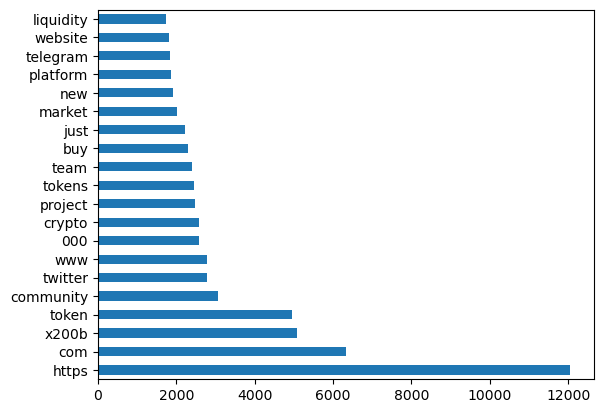

In [165]:
# Plot top occurring words 
X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

In [126]:
# Set up pipeline 
pipe = Pipeline([
    ('cvec', cvec),
    ('nb', MultinomialNB())
])

pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer(stop_words='english')),
  ('nb', MultinomialNB())],
 'verbose': False,
 'cvec': CountVectorizer(stop_words='english'),
 'nb': MultinomialNB(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': 'english',
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': 'warn'}

In [136]:
# Search over following hyperparameters
pgrid = {
    'cvec__max_df': [1, 5, 10],
    # 'cvec__max_features': [2_000, 5_000, None],
    # 'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, 'english'],
    # 'cvec__binary': [False, True]
}

In [137]:
# Instantiate gridsearchCV
gs = GridSearchCV(pipe, param_grid = pgrid, cv = 5, n_jobs = 8)

In [138]:
# Fit gridsearchcv to data
gs.fit(X_train, y_train)

C:\Users\johng\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\johng\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\johng\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'cvec__binary': [False, True],
                         'cvec__max_df': [1, 5, 10],
                         'cvec__max_features': [2000, 4000, 6000, 8000, None],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [143]:
gs.best_params_

{'cvec__binary': False,
 'cvec__max_df': 10,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [144]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9860485082635759
0.9253539253539254


In [145]:
preds = gs.predict(X_test)

In [146]:
confusion_matrix(y_test, preds)

array([[683,  92],
       [ 24, 755]], dtype=int64)

In [ ]:
# KNN, logreg, RF 
# get metrics on all of them - recll, precision, confusion matrix, get scores 
# lb 502 has some good graphics
# countvectorizer, can do bigrams and trigrams 